#### Sprint 12 Project

#### Summary:
    In this this project, I will be using several machine learning models in order to predict the market value of a car for 
the Rusty Bargain company.  The models included in this project are: Linear Regression, Stochastic Gradient Descent Linear
Regression, Decision Tree Regressor, Random Forest Regressor, XG Boost, CatBoost Regressor and Light GBM Regressor.  I will 
be using the RMSE metric for evaluating the quality of these model predictions. I will also evaluate the speed of each model's training time and prediction time as well.  There is also a section in this project where I have created a KDE plot and several
boxplots for descriptive statistics.

#### Project Description
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

In [91]:
#Import the necessary libraries.
import pandas as pd 

from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np 

from sklearn.metrics import mean_squared_error, make_scorer

from catboost import CatBoostRegressor 

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor 

from sklearn.ensemble import RandomForestRegressor 

import time 

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import RandomizedSearchCV

from sklearn.base import BaseEstimator, RegressorMixin 

import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

In [92]:
#Create a try and except clause using the the pd.read_csv() function in order to upload the
#csv file on a local and nonlocal computer.  Save the csv file as a dataframe under the variable
#df.
try:
    df = pd.read_csv('car_data.csv') 
except:
    df = pd.read_csv('/datasets/car_data.csv')

#### Data preparation

In [93]:
#Use the head() method in order to print the first five rows of the dataframe.
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Code Result:
It seems that the titles of the dataframe need to be converted to lowercase.  There also seems to be missing
values in several columns of the dataframe.

In [94]:
#Use the rename() method nin order to rename the columns of the dataframe appropriately.
df = df.rename(columns={'DateCrawled': 'date_crawled',
                        'Price': 'price',
                         'VehicleType': 'vehicle_type',
                         'RegistrationYear': 'registration_year',
                         'Gearbox': 'gearbox',
                         'Power': 'power',
                         'Model': 'model',
                         'Mileage': 'mileage',
                         'RegistrationMonth': 'registration_month',
                         'FuelType': 'fuel_type',
                         'Brand': 'brand',
                         'NotRepaired': 'not_repaired',
                         'DateCreated': 'date_created',
                         'NumberOfPictures': 'number_of_pictures',
                         'PostalCode': 'postal_code',
                         'LastSeen': 'last_seen'})

In [95]:
#Use the info method in order to check the datatypes of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

Code Result:
It appears that the date_crawled, date_created and last_seen columns need to be converted from
the object to the datetime64 data type.

In [96]:
#Use the pd.to_datetime() method in order to convert the date_crawled, date_created and
#last_seen columns to the datetime64 data type.
df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors='coerce') 
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce') 
df['last_seen'] = pd.to_datetime(df['last_seen'], errors='coerce') 

C:\Users\HP\AppData\Local\Temp\ipykernel_12628\304031342.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_crawled'] = pd.to_datetime(df['date_crawled'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_12628\304031342.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')


In [97]:
#Use the info() method once again in order to double check the columns of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   mileage             354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

Code Result:
It appears that the date_crawled, date_created and last_seen columns were converted from the object type to
the datetime64 data type successfully.

In [98]:
#Use the isna() and sum() methods in order to check for missing values in the columns of the dataframe.
df.isna().sum()

date_crawled               0
price                      0
vehicle_type           37490
registration_year          0
gearbox                19833
power                      0
model                  19705
mileage                    0
registration_month         0
fuel_type              32895
brand                      0
not_repaired           71154
date_created               0
number_of_pictures         0
postal_code                0
last_seen             126218
dtype: int64

Code Result:
It appears that there are a significant number of missing values in the: vehicle_type, registration_year, fuel_type, and not_repaired columns.  The missing values in the not_repaired column can be filled with the string, "unknown".  The missing values in the vehicle_type, registration_year and fuel_type columns cannot be recovered and should be dropped from the dataframe.

In [99]:
#Use the fillna() method in order to fill the missing values in the not_repaired column with 'unknown'.
df['not_repaired'].fillna('unknown', inplace=True) 

##Use the isna() and sum() methods in order to double check for missing values in the not_repaired column.
df['not_repaired'].isna().sum() 

0

Code Result:
There are no longer any missing values noted in the not_repaired dataframe, but the name of this column is a
bit confusing.  I will create a column named reparied with converted values from the not_repaired column for more
clarity.

In [100]:
#Create a function to convert the entries in the not_repaired column to entries for a repaired column.
def convert_repaired(row_entry):
    if row_entry == 'yes':
        return 'no'
    elif row_entry == 'no':
        return 'yes'
    else:
        return 'unknown'

#Use the apply() method and the convert_repaired() function to create repaired column 
#for the dataframe.
df['repaired'] = df['not_repaired'].apply(convert_repaired) 

Code Result:
It appears that missing values in the not_repaired column were filled successfully.  There are no more
missing values noted in this column.

In [101]:
#Use the dropna() method in order to drop the other missing values in the dataframe.
df.dropna(inplace=True)

In [102]:
#Use the isna() and sum() methods again in order to double check for missing values in the columns of the dataframe.
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
repaired              0
dtype: int64

Code Result:
There are no longer any missing values noted in the dataframe.  The missing values were successfully filled or dropped
appropriately.

In [103]:
#Use the dupliated() and sum() methods in order to count the amount of duplicate values in the dataframe.
df.duplicated().sum()

165

Code Result:
There are 165 duplicate values noted in the dataframe.

In [104]:
#Use the drop_duplicates() method in order to drop the duplicate values from the dataframe.
df = df.drop_duplicates() 

#Use the dupliated() and sum() methods again in order dpuble check for duplicate values in the dataframe.
df.duplicated().sum()

0

Code Result:
There are no longer any duplicate values noted in the dataframe.  The duplicate values were successfully dropped.

#### Descriptive Statistics

C:\Users\HP\AppData\Local\Temp\ipykernel_12628\2387442266.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], label='Price', shade=True)


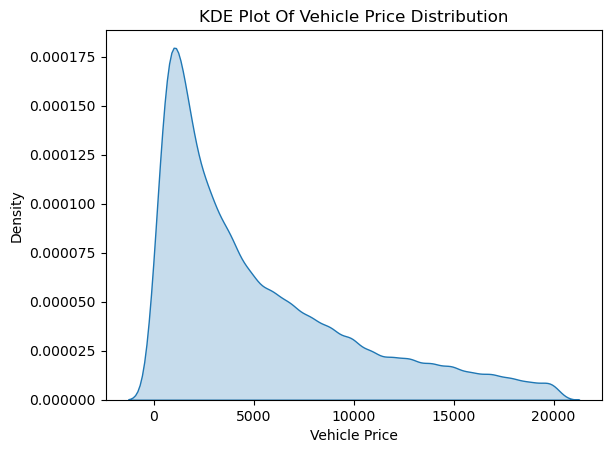

In [105]:
#Use sns.kdeplot() in order to make a KDE plot of the distribution of vehicle price
#amounts throughout the dataframe.
sns.kdeplot(df['price'], label='Price', shade=True) 

plt.xlabel("Vehicle Price") 

plt.title("KDE Plot Of Vehicle Price Distribution")

plt.tight_layout

plt.show()

Chart Conclusion:
According to the KDE plot the vehicle price entry in the price column of the dataframe with the highest kernel
denisty is: approximately $1,000, with a kernel density of: approximately 0.000180.

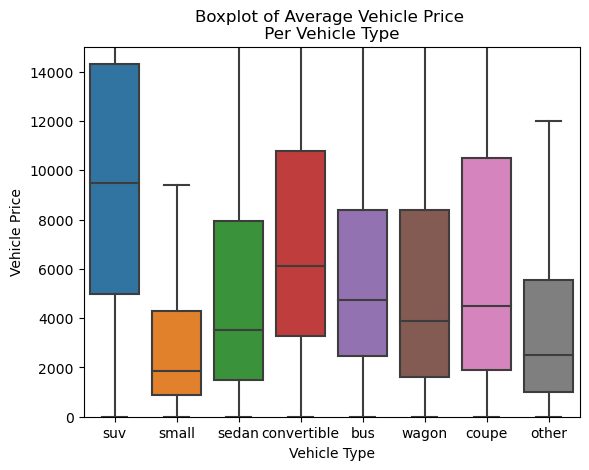

In [106]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per vehicle type.
vehicle_type_box = sns.boxplot(x=df['vehicle_type'], y=df['price'], showfliers=False) 

plt.xlabel('Vehicle Type') 

plt.ylabel('Vehicle Price') 
plt.title("Boxplot of Average Vehicle Price \n Per Vehicle Type ")

plt.ylim(0, 15000)
plt.show()

Chart Conclusion:
According to the boxplot, vehicle type entry with the highest median vehicle price is: suv, with a 
median vehicle price of: approximately $9,500.  The vehicle type entry with the lowest median price is:
small, with a median price of: approximately $1,900.

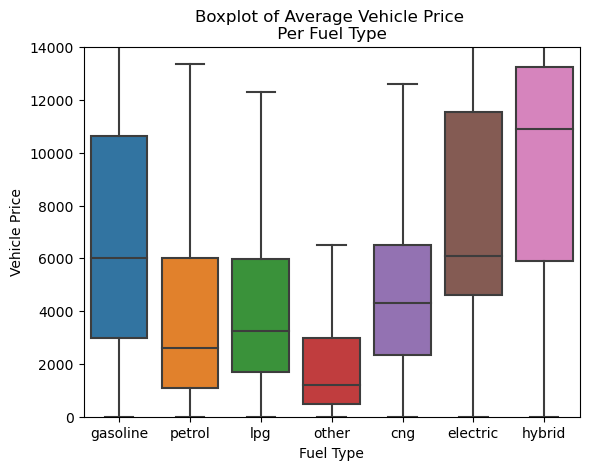

In [107]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#per fuel type.
vehicle_type_box = sns.boxplot(x=df['fuel_type'], y=df['price'], showfliers=False) 

plt.xlabel('Fuel Type') 

plt.ylabel('Vehicle Price') 
plt.title("Boxplot of Average Vehicle Price \n Per Fuel Type ")

plt.ylim(0, 14000)
plt.show()

Chart Conclusion:
According to the boxplot, fuel type entry with the highest median vehicle price is: hybrid, with a 
median vehicle price of: approximately $11,500.  The vehicle type entry with the lowest median price is:
other, with a median price of: approximately $900.

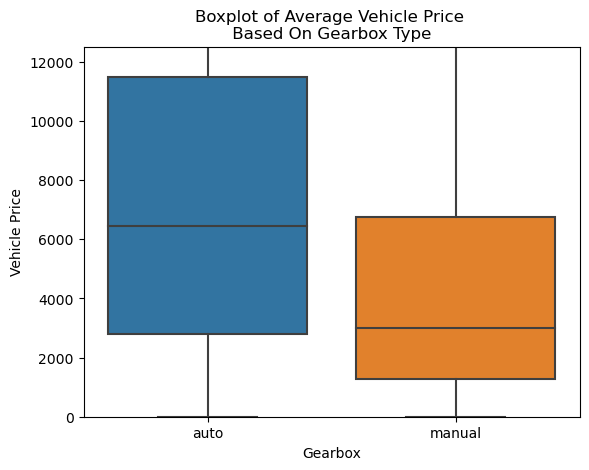

In [108]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#gearbox type.
gearbox_box = sns.boxplot(x=df['gearbox'], y=df['price'], showfliers=False) 

plt.xlabel('Gearbox') 

plt.ylabel('Vehicle Price') 
plt.title("Boxplot of Average Vehicle Price \n Based On Gearbox Type ")

plt.ylim(0, 12500)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the auto gearbox type have a higher median vehicle price (approximately $6,500) 
than cars with the manual gearbox type (approximately $3,000).

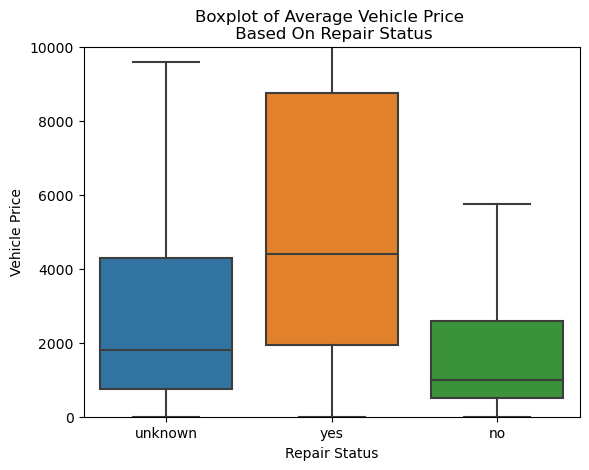

In [109]:
#Use sns.boxplot() in order to create a boxplot of average vehicle price
#based on repair status.
repaired_box = sns.boxplot(x=df['repaired'], y=df['price'], showfliers=False) 

plt.xlabel('Repair Status') 

plt.ylabel('Vehicle Price') 
plt.title("Boxplot of Average Vehicle Price \n Based On Repair Status")

plt.ylim(0, 10000)
plt.show()

Chart Conclusion:
According to the boxplot, cars with the 'yes' repaired status have a higher median vehicle price (approximately $4,700) 
than cars with the 'no' repaired status (approximately $1,000).

#### Dataframe Copy and Column Encoding

In [110]:
#Create an index for the columns with numerical features for scaling.S
numerical_features = ['power',
                      'mileage',
                      'registration_month',
                      'registration_year']
#Use StandardScaler() to create a scaler.
scaler = StandardScaler()
#Scale the numerical features with the fit_transform() method.
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#Use pd.get_dummies() in order to perform OHE encoding on the categorical features.
encoded_df = pd.get_dummies(df, columns=['gearbox', 'not_repaired'], drop_first=True)

## Model training

In [111]:
#Create seed for the random state.
seed = 12345 

#Use the np.random.RandomState() method in order to create a random state for the models.
state = np.random.RandomState(seed)

In [112]:
#Create a function in order to calculate the rmse for each model.
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) 

#Use the make_scorer() function to create a scorer for the GridSearch and RandomizedSearch models using the rmse
#metric.  Set the greater_is_better parameter to False.
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [113]:
#Set the price column as the target.
y = encoded_df['price'] 
#Create the features dataset.
X = encoded_df.drop(['price', 
                     'date_crawled', 
                     'date_created', 
                     'last_seen',
                     'model', 
                     'brand', 
                     'repaired',
                     'postal_code',
                     'vehicle_type',
                     'fuel_type',
                     'number_of_pictures'], axis=1)
#Use the train_test_split method to split the features and the target datasets into training
#and test sets using a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state) 

#Convert the training and test sets to float data type.
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

X_train.columns

Index(['registration_year', 'power', 'mileage', 'registration_month',
       'gearbox_manual', 'not_repaired_unknown', 'not_repaired_yes'],
      dtype='object')

In [114]:
#Use the np.mean() method in order to get the mean for the training set of the target dataset.
y_mean_pred = np.mean(y_train)
#Use the rmse() function to calculate the rmse of between the test set of the target dataset and 
#the product of the mean for the training set of the target dataset and the length the of the
#test set of target datset. This will be the baseline rmse for the dataset.
baseline_rmse = rmse(y_test, [y_mean_pred] * len(y_test))

In [115]:
#Use np.mean() in order order to get the mean value of the price column of the dataframe.
price_mean = np.mean(df['price']) 

#Create a function that calculates the RMSE error percentage.
def rmse_percentage(model_rmse, y_mean):
    percentage = (model_rmse / y_mean) * 100
    return percentage

#Print the Baseline RMSE.
print(f"Baseline RMSE: {baseline_rmse}")
#Print Basline RMSE error percentage.
print(f"Baseline RMSE Error Perecentage {rmse_percentage(baseline_rmse, price_mean):.2f} %")

Baseline RMSE: 4829.580498324405
Baseline RMSE Error Perecentage 92.13 %


#### Linear Regression Model

In [116]:
#Create the a Linear Regression model using the LinearRegression() class.
lr = LinearRegression()

#Use the time.time() function in order to calculate the start time for the model's
#training process.
lr_st = time.time()
#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets.
lr.fit(X_train, y_train) 
#Use the time.time() function in order to calculate the end time for the model's
#training process.
lr_et = time.time()
#Calculate the model's total training time by subtracting the end time from the start time.
lr_time = lr_et - lr_st 

#Print the model's total training time.
print(f"Linear Regression Model Training Time {lr_time} seconds")

Linear Regression Model Training Time 0.07435488700866699 seconds


In [117]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process.
lr_pred_st = time.time()
#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the Linear Regeression model.
lr_predicted = lr.predict(X_test) 
#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
lr_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time.
lr_pred_time = lr_pred_et = lr_pred_st

#Print the model's total training time.
print(f"Linear Regression Model Prediction Time {lr_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values.
lr_rmse = rmse(y_test, lr_predicted) 
#Print the model's RMSE.
print(f"Linear Regression Model RMSE {lr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Linear Regressor RMSE Error Percentage: {rmse_percentage(lr_rmse, price_mean):.2f} %")

Linear Regression Model Prediction Time 1740610604.5286837 seconds
Linear Regression Model RMSE 3628.3256027859097
Linear Regressor RMSE Error Percentage: 69.21 %


#### SGD Linear Regression Model

In [118]:
#Create a class for a Stochastic Gradient Descent Linear Regression model.
class SGDLinearRegression:
    #Initialize the self paramter and the: step_size, epochs, batch_size, and reg_weight hyperparameters
    def __init__(self, step_size, epochs, batch_size, reg_weight):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_weight = reg_weight
    
    #Create the fit() function to train the model.
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.zeros(X.shape[1])
        
        #Create a for loop to calculate the number of epochs and batches need for the model's
        # weigh calculation.
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                #Calculate the gradient.
                gradient = (
                    2
                    * X_batch.T.dot(X_batch.dot(w) - y_batch)
                    / X_batch.shape[0]
                )
								
                #Calculate the regularization weight.
                reg = 2 * w.copy()
                reg[0] = 0
                #Multiply the gradient by the regularization weight,
                gradient +=  self.reg_weight * reg
                #Subtract the product of the step size the gradient(with regularization)
                #from the weight.
                w -= self.step_size * gradient
                
        #Create a variable for the calculated weights without bias.
        self.w = w[1:]
        #Create a variable for the calculated weights with bias.
        self.w0 = w[0]
    
    #Create the predict() method in order to calculate predicted values using the model.
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


In [119]:
#Use the SGDLinearRegression() method in order to create an SGD Linear Regression model with 
#default hyperparameters.  The model's hyperparameters will be tuned using GridSearch.
sgd = SGDLinearRegression(step_size=0.01, epochs=10, batch_size=100, reg_weight=0.0)

In [120]:
#Create a parameter grid for the SGD Linear Regression model.
sgd_param_grid = {
    'step_size': [0.001, 0.01, 0.05],
    'epochs': [100, 300],
    'batch_size': [50, 100],
    'reg_weight': [0.001, 0.01, 0.1, 1]
}

In [121]:
#Create a class named SGDLinearRegressionWrapped that contains the wrapped version of the SGDLinearRegression model
#in order to make the model more compatible with GridSearch.
class SGDLinearRegressionWrapped(BaseEstimator, RegressorMixin):
    def __init__(self, step_size=0.01, epochs=10, batch_size=100, reg_weight=0.0):
        self.step_size = step_size 
        self.epochs = epochs 
        self.batch_size = batch_size 
        self.reg_weight = reg_weight 
        self.model = SGDLinearRegression(step_size, epochs, batch_size, reg_weight) 
        
    def fit(self, X, y):
        self.model.fit(X, y) 
        
    def predict(self, X):
        self.model.predict(X)

In [122]:
#Create wrapped model for the SGD Linear Regression model for GridSearch.
sgd_wrapped = SGDLinearRegressionWrapped()

In [123]:
#Create a GridSearch model for the SGD Linear Regression model.
sgd_gsearch = GridSearchCV(estimator=sgd_wrapped,
                           param_grid=sgd_param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring=rmse_scorer) 
#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
sgd_gsearch.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDLinearRegressionWrapped(), n_jobs=-1,
             param_grid={'batch_size': [50, 100], 'epochs': [100, 300],
                         'reg_weight': [0.001, 0.01, 0.1, 1],
                         'step_size': [0.001, 0.01, 0.05]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [124]:
#Use the best_score_ method in order to get the best score for the model.
sgd_bscore = sgd_gsearch.best_score_
#Use the best_params_ method in order to get the best score for the model.
sgd_bparams = sgd_gsearch.best_params_  

#Print the SGD Linear Regression Model's Best Score.
print(f"SGD Linear Regression Best Score: {sgd_bscore}")
#Print the SGD Linear Regression Model's Best Hyperparameters.
print(f"SGD Linear Regression Model Best Hyperparameters: \n{sgd_bparams}")

SGD Linear Regression Best Score: nan
SGD Linear Regression Model Best Hyperparameters: 
{'batch_size': 50, 'epochs': 100, 'reg_weight': 0.001, 'step_size': 0.001}


In [125]:
#Create an SGD Linear Regression model using the SGDLinearRegression() class with tuned hyperparameters.
sgd = SGDLinearRegression(batch_size=50, epochs=100, reg_weight=0.001, step_size=0.001) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
sgd_st = time.time()
#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
sgd.fit(X_train, y_train) 
#Use the time.time() function in order to calculate the end time for the model's
#training process.
sgd_et = time.time()
#Calculate the model's total training time by subtracting the end time from the start time. 
sgd_time = sgd_et - sgd_st

#Print the model's total training time.
print(f"SGD Linear Regression Training Time {sgd_time} seconds")

SGD Linear Regression Training Time 67.07003450393677 seconds


In [126]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
sgd_pred_st = time.time()
#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the SGD Linear Regeression model. 
sgd_predicted = sgd.predict(X_test) 
#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
sgd_pred_et = time.time() 
#Calculate the model's total prediction time by subtracting the end time from the start time. 
sgd_pred_time = sgd_pred_et - sgd_pred_st

#Print the model's total training time.
print(f"SGD Prediction Time {sgd_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
sgd_rmse = rmse(y_test, sgd_predicted) 
#Print the model's RMSE.
print(f"SGD Linear Regression RMSE: {sgd_rmse}")
#Print the model's RMSE Serror percentage.
print(f"SGD Linear Regression RMSE Error Percentage: {rmse_percentage(sgd_rmse, price_mean):.2f} %")

SGD Prediction Time 0.008626222610473633 seconds
SGD Linear Regression RMSE: 3636.3867717173257
SGD Linear Regression RMSE Error Percentage: 69.37 %


#### Decision Tree Regressor Model

In [127]:
#Use DecisionTreeRegressor() to create a Decision Tree Regressor model.
dt_regressor = DecisionTreeRegressor(random_state=state)

In [128]:
#Create a parameter grid for the Decision Tree Regressor's Gridsearch Model.
dtr_param_grid = {
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
} 

#Create a GridSearch Model for the Decision Tree Regressor model.
dtr_gsearch = GridSearchCV(estimator=dt_regressor,
                           param_grid=dtr_param_grid, 
                           cv=5, n_jobs=-1, 
                           scoring=rmse_scorer)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
dtr_gsearch.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x2004B967040),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [129]:
#Print the Decision Tree Regressor Model's Best Score.
print(f"Descision Tree Regressor Best Score:{dtr_gsearch.best_score_}") 
#Print the Decision Tree Regressor Model's Best Hyperparameters.
print(f"Decision Tree Regressor Best HyperParameters: \n{dtr_gsearch.best_params_}")

Descision Tree Regressor Best Score:-2356.3516829413456
Decision Tree Regressor Best HyperParameters: 
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [130]:
#Recreate the Decision Tree Regressor Model with tuned hyperparameters.
dtr = DecisionTreeRegressor(max_depth=15, 
                            max_features='sqrt',
                            min_samples_leaf=2,
                            min_samples_split=5,
                            random_state=state)

#Use the time.time() function in order to calculate the start time for the model's
#training process.
dt_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
dtr.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
dt_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
dt_training_time = dt_et - dt_st

#Print the model's total training time.
print(f"Decision Tree Regressor Training Time {dt_training_time} seconds")

Decision Tree Regressor Training Time 0.17175745964050293 seconds


In [131]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
dt_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
dtr_predicted = dtr.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
dt_pred_et = time.time() 

#Calculate the model's total prediction time by subtracting the end time from the start time. 
dt_pred_time = dt_pred_et = dt_pred_st 
#Print the model's total prediction time.
print(f"Decision Tree Regressor Prediction Time: {dt_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
dtr_rmse = rmse(y_test, dtr_predicted)
#Print the model's RMSE.
print(f"Decision Tree Regressor RMSE: {dtr_rmse}")
#Print the model's RMSE error percentage.
print(f"Decision Tree Regressor Error Percentage: {rmse_percentage(dtr_rmse, price_mean):.2f} %")

Decision Tree Regressor Prediction Time: 1740611066.4945643 seconds
Decision Tree Regressor RMSE: 2290.809417270339
Decision Tree Regressor Error Percentage: 43.70 %


#### Random Forest Regressor Model

In [132]:
#Use RandomForestRegressor() to create a Random Forest Regressor Model.
rfr = RandomForestRegressor(random_state=state) 

In [133]:
#Create a paramter grid for the Random Forest Regressor Model's GridSearch.
rfr_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

In [ ]:
#Create a GridSearch Model for the Random Forest Regressor model.
rfr_gsearch = GridSearchCV(estimator=rfr,
                           param_grid=rfr_param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=rmse_scorer) 

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
rfr_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"Random Forest Regressor Model Best Score: {rfr_gsearch.best_score_}") 
#Use the best_params_ method in order to get the best score for the model.
print(f"Random Forest Regressor Model Best Hyperparameters: \n{rfr_gsearch.best_params_}")

Random Forest Regressor Model Best Score: -2140.6648113623364
Random Forest Regressor Model Best Hyperparameters: 
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
#Recreate the Random Forest Regressor Model with tuned hyperparameters.
rfr = RandomForestRegressor(max_depth=20,
                            max_features='sqrt',
                            min_samples_leaf=2,
                            min_samples_split=5,
                            n_estimators=100, 
                            random_state=state) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
rf_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
rfr.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
rf_et = time.time() 
#Calculate the model's total training time by subtracting the end time from the start time. 
rf_time = rf_et - rf_st

#Print the model's total training time.
print(f"Random Forest Regressor Training Time: {rf_time} seconds")

Random Forest Regressor Training Time: 16.392171144485474 seconds


In [ ]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
rf_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
rfr_predicted = rfr.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
rf_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time. 
rf_pred_time = rf_pred_et - rf_pred_st

#Print the model's total prediction time.
print(f"Random Forest Regressor Prediction Time: {rf_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
rfr_rmse = rmse(y_test, rfr_predicted)
#Print the model's RMSE.
print(f"Random Forest Regressor RMSE: {rfr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Random Forest Regressor RMSE Error Percentage: {rmse_percentage(rfr_rmse, price_mean):.2f} %")

Random Forest Regressor Prediction Time: 2.4308485984802246 seconds
Random Forest Regressor RMSE: 2092.6816423022206
Random Forest Regressor RMSE Error Percentage: 39.92 %


#### XG Boost Regressor Model

In [ ]:
#Use XGBRegressor() in order to create an XG Boost Regressor Model.
xgbr = XGBRegressor(random_state=state) 

In [ ]:
#Create a paramter grid for the  Regressor Model's GridSearch.
xgbr_param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1],  
    'max_depth': [3, 4],  
}

In [ ]:
#Create a GridSearch Model for the XG Boost Regressor model.
xgbr_gsearch = GridSearchCV(estimator=xgbr, 
                           param_grid=xgbr_param_grid, 
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=rmse_scorer) 

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
xgbr_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2057656275, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'),
             verbose=2)

In [ ]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"XG Boost Regressor Best Score: {xgbr_gsearch.best_score_}")
#Use the best_params_ method in order to get the best score for the model.
print(f"XG Boost Regressor Best Hyperparameters: {xgbr_gsearch.best_params_}")

XG Boost Regressor Best Score: -2173.532554654006
XG Boost Regressor Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
#Recreate the XG Boost Regressor Model with tuned hyperparameters.
xgb = XGBRegressor(learning_rate=0.1, 
                       max_depth=4, 
                       n_estimators=200, 
                       random_state=state) 

 #Use the time.time() function in order to calculate the start time for the model's
#training process.                     
xgb_st = time.time() 

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
xgb.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
xgb_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
xgb_time = xgb_et - xgb_st 

#Print the model's total training time.
print(f"XG Boost Regressor Training Time {xgb_time} seconds")

XG Boost Regressor Training Time 1.4901914596557617 seconds


In [ ]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
xgb_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
xgb_predicted = xgb.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
xgb_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time. 
xgb_pred_time = xgb_pred_et - xgb_pred_st 
#Print the model's total prediction time.
print (f"XG Boost Regressor Prediction Time: {xgb_pred_time} seconds")

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
xgb_rmse = rmse(y_test, xgb_predicted) 
#Print the model's RMSE.
print(f"XG Boost Regressor RMSE: {xgb_rmse}")
#Print the model's RMSE Serror percentage.
print(f"XG Boost Regressor RMSE Error Percentage: {rmse_percentage(xgb_rmse, price_mean):.2f} %")

XG Boost Regressor Prediction Time: 0.140946626663208 seconds
XG Boost Regressor RMSE: 2142.4653290855363
XG Boost Regressor RMSE Error Percentage: 40.87 %


#### CatBoost Regressor Model

In [ ]:
#Use CatBoostRegressor() to create a CatBoost Regressor Model.
cbr = CatBoostRegressor(random_seed=state, verbose=0)

In [ ]:
#Create a paramter grid for the CatBoost Regressor Model's GridSearch.
cb_param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.1],
    'iterations': [100, 200],
    'random_seed': [42],
    'metric_period': [50, 100]
}

In [ ]:
#Create a GridSearch Model for the CatBoost Regressor model.
cbr_gsearch = GridSearchCV(estimator=cbr, 
                           param_grid=cb_param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring=rmse_scorer)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
cbr_gsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002004B9E04D0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'iterations': [100, 200],
                         'learning_rate': [0.1], 'metric_period': [50, 100],
                         'random_seed': [42]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"CatBoostRegressor Best Score: {cbr_gsearch.best_score_}") 
#Use the best_params_ method in order to get the best score for the model.
print(f"CatBoostRegressor Best Hyperparameters: \n{cbr_gsearch.best_params_}")

CatBoostRegressor Best Score: -2167.027103662192
CatBoostRegressor Best Hyperparameters: 
{'depth': 6, 'iterations': 200, 'learning_rate': 0.1, 'metric_period': 50, 'random_seed': 42}


In [ ]:
#Recreate the CatBoost Regressor Model with tuned hyperparameters.
cbr = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.1, metric_period=50, random_seed=seed) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
cbr_st = time.time() 

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
cbr.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
cbr_et = time.time() 

#Calculate the model's total training time by subtracting the end time from the start time. 
cbr_time = cbr_et - cbr_st 

#Print the model's total training time.
print(f"CatBoost Regressor Training Time: {cbr_time} Seconds")

0:	learn: 4497.7135533	total: 91ms	remaining: 18.1s
50:	learn: 2233.8525218	total: 1.35s	remaining: 3.94s
100:	learn: 2187.4540442	total: 2.64s	remaining: 2.58s
150:	learn: 2160.0359735	total: 3.75s	remaining: 1.22s
199:	learn: 2137.7350996	total: 5.09s	remaining: 0us
CatBoost Regressor Training Time: 5.298842668533325 Seconds


In [ ]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
cbr_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
cbr_predicted = cbr.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
cbr_pred_et = time.time()
#Calculate the model's total prediction time by subtracting the end time from the start time.
cbr_pred_time = cbr_pred_et - cbr_pred_st
#Print the model's total prediction time.
print(f"CatBoost Regressor Prediction Time: {cbr_pred_time}") 

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
cbr_rmse = rmse(y_test, cbr_predicted)
#Print the model's RMSE.
print(f"CatBoost Regressor Model RMSE {cbr_rmse}")
#Print the model's RMSE Serror percentage.
print(f"CatBoost Regressor RMSE Error Percentage: {rmse_percentage(cbr_rmse, price_mean):.2f} %")

CatBoost Regressor Prediction Time: 0.03014206886291504
CatBoost Regressor Model RMSE 2140.595572156662
CatBoost Regressor RMSE Error Percentage: 40.83 %


#### LightGBM Model

In [ ]:
#Use LGMRegressor() to create a Light GBM Regressor Model.
lgb = LGBMRegressor(random_state=state)

In [ ]:
#Create a paramter grid for the Light GBM Regressor Model's GridSearch.
lgb_param_grid = {
    'num_leaves': [31],
    'learning_rate': [0.1],
    'n_estimators': [100, 200]
}

In [ ]:
#Create a GridSearch Model for the  model.
lgb_gsearch = GridSearchCV(estimator=lgb, 
                           param_grid=lgb_param_grid, 
                           scoring=rmse_scorer,
                           cv=3,
                           verbose=2, 
                           n_jobs=-1)

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
lgb_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 129740, number of used features: 7
[LightGBM] [Info] Start training from score 5240.639911


GridSearchCV(cv=3,
             estimator=LGBMRegressor(random_state=RandomState(MT19937) at 0x20051BC7B40),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'n_estimators': [100, 200],
                         'num_leaves': [31]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'),
             verbose=2)

In [ ]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"LightGBM Model Best Score: {lgb_gsearch.best_score_}")
#Use the best_params_ method in order to get the best score for the model.
print(f"LightGBM Best Hyperparameters: {lgb_gsearch.best_params_}")

LightGBM Model Best Score: -2118.8855761926707
LightGBM Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}


In [ ]:
#Recreate the Regressor Model with tuned hyperparameters.
lgb = LGBMRegressor(learning_rate=0.1,
                        n_estimators=200,
                        num_leaves=31, 
                        random_state=state) 

#Use the time.time() function in order to calculate the start time for the model's
#training process.
lgb_st = time.time()

#Use the fit() method in order to train the model with the training sets of the 
#scaled features dataset and target datasets. 
lgb.fit(X_train, y_train) 

#Use the time.time() function in order to calculate the end time for the model's
#training process.
lgb_et = time.time() 
#Calculate the model's total training time by subtracting the end time from the start time.
lgb_time = lgb_et - lgb_st

#Print the model's total training time.
print(f"Light GBM Regressor Model Training Time: {lgb_time} seconds")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 129740, number of used features: 7
[LightGBM] [Info] Start training from score 5240.639911
Light GBM Regressor Model Training Time: 1.4119491577148438 seconds


In [ ]:
#Use the time.time() function in order to calculate the start time for the model's
#prediction process. 
lgb_pred_st = time.time()

#Use the predict() method in order to make a prediciton based on the test set of the scaled
#features dataset using the  model. 
lgb_predicted = lgb.predict(X_test) 

#Use the time.time() function in order to calculate the end time for the model's
#prediction process.
lgb_pred_et = time.time()

#Calculate the model's total prediction time by subtracting the end time from the start time. 
lgb_pred_time = lgb_pred_et - lgb_pred_st
#Print the model's total prediction time.
print(f"Light GBM Regressor Prediction Time: {lgb_pred_time} seconds") 

#Use the rmse() method in order to print the rmse between the test set of the target dataset
#and the model's predicted values. 
lgb_rmse = rmse(y_test, lgb_predicted)
#Print the model's RMSE.
print(f"Light GBM Regressor RMSE: {lgb_rmse}")
#Print the model's RMSE Serror percentage.
print(f"Light GBM Regressor RMSE Error Percentage: {rmse_percentage(lgb_rmse, price_mean):.2f} %")

Light GBM Regressor Prediction Time: 0.4815695285797119 seconds
Light GBM Model RMSE: 2086.1561609471773
Light GBM Regressor RMSE Error Percentage: 39.79 %


#### Model analysis

Baseline RMSE: 4829.580498324405
Baseline RMSE Error Perecentage 92.13 % 

Models Ranked Based on RMSE:

1) Light GBM Regressor Model
Light GBM Regressor Model RMSE: 2086.1561609471773
Light GBM Regressor RMSE Error Percentage: 39.79 %
Light GBM Regressor Model Training Time: 1.7313728332519531 seconds
Light GBM Regressor Prediction Time: 0.5325772762298584 seconds

2) CatBoost Regressor Model
CatBoost Regressor Model RMSE 2140.595572156662
CatBoost Regressor RMSE Error Percentage: 40.83 % 
CatBoost Regressor Training Time: 4.900826930999756 Seconds
CatBoost Regressor Prediction Time: 0.03092050552368164 seconds 

3) XG Boost Regressor Model
XG Boost Regressor RMSE: 2142.4653290855363
XG Boost Regressor RMSE Error Percentage: 40.87 %
XG Boost Regressor Training Time 1.458101749420166 seconds
XG Boost Regressor Prediction Time: 0.1545867919921875 seconds

4) Random Forest Regressor Model
Random Forest Regressor RMSE: 2092.6816423022206
Random Forest Regressor RMSE Error Percentage: 39.92 %
Random Forest Regressor Training Time: 14.12435007095337 seconds
Random Forest Regressor Prediction Time: 1.852637529373169 seconds

5) Decision Tree Regressor Model
Decision Tree Regressor RMSE: 2351.197487887341
Decision Tree Regressor Error Percentage: 44.85 %
Decision Tree Regressor Training Time: 0.3549833297729492 seconds
Decision Tree Regressor Prediction Time: 1740609753.8374124 seconds

6) Linear Regression Model:
Linear Regression Model RMSE 3628.3256027859097
Linear Regressor RMSE Error Percentage: 69.21 %
Linear Regression Model Training Time 0.0967400074005127 seconds
Linear Regression Model Prediction Time 1740558160.2211287

7) SDG Linear Regression Model
SGD Linear Regression RMSE: 3636.3867717173257
SGD Linear Regression RMSE Error Percentage: 69.37 %
SGD Linear Regression Training Time 63.74746584892273 seconds
SGD Prediction Time 0.025933504104614258 seconds 

Results Observation:
It appears that all the models had a better RMSE score than the baseline RMSE score.

#### Final Conclusion:
It appears that the Light GBM Regressor model with tuned hyperparameters is the best model for predicting
future car market values.  The Light GBM Regressor model had an RMSE of: 2086.1561609471773 and
an RMSE Error Percentage of 39.79 %.  THe Light GBM Regressor model had a fairly short training and prediciton
time as well.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed